# 🎓 **Taller 4.1: Taller de Medidas de Similitud y Disimilitud**


## OBJETIVOS DEL TALLER:
Comprender y aplicar diferentes medidas de similitud y disimilitud en conjuntos de datos, analizando su comportamiento en distintos contextos de distribución de datos. Implementar y calcular al menos 6 medidas de distancia diferentes:

* ✅Distancia Euclidiana (L2)
* ✅Distancia Manhattan (L1)
* ✅Distancia Chebyshev (L∞)
* ✅Similitud de Coseno
* ✅Distancia de Mahalanobis
* ✅Distancia de Jaccard

Representar gráficamente datasets en espacios bidimensionales

* ✅Visualizar centros y puntos de referencia en gráficos de dispersión
* ✅Interpretar relaciones espaciales a partir de representaciones visuales

# 🔧 **CONFIGURACIÓN INICIAL**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 8]

In [2]:
import scipy.stats as st

def visualize_dataset(x, y, ds_center, c1, c2):
  fig, ax = plt.subplots()
  ax.scatter(x, y)
  ds_center_r = [np.mean(x), np.mean(y)]
  print(f'Centro real del cluster: x={ds_center_r[0]:.2f}, y={ds_center_r[1]:.2f}')
  print(f'Centro del cluster utilizado para el ejemplo: x={ds_center[0]:.2f}, y={ds_center[1]:.2f}')
  ax.scatter(ds_center[0], ds_center[1], s=200, c='b')
  # plot candidates
  ax.scatter(c1[0], c1[1], s=200, c='r')
  ax.scatter(c2[0], c2[1], s=200, c='g', marker='v')
  deltaX = (max(x) - min(x))/10
  deltaY = (max(y) - min(y))/10
  xmin = min(x) - deltaX
  xmax = max(x) + deltaX
  ymin = min(y) - deltaY
  ymax = max(y) + deltaY
  # Create meshgrid
  xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
  positions = np.vstack([xx.ravel(), yy.ravel()])
  values = np.vstack([x, y])
  kernel = st.gaussian_kde(values)
  f = np.reshape(kernel(positions).T, xx.shape)
  # create gaussian contour lines
  cfset = ax.contourf(xx, yy, f, cmap='coolwarm', alpha=0.2)
  ax.imshow(np.rot90(f), cmap='coolwarm', extent=[xmin, xmax, ymin, ymax], alpha=0.2)
  # write labels
  cset = ax.contour(xx, yy, f, colors='k', linestyles='dotted')
  ax.clabel(cset, inline=1, fontsize=10)
  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  plt.title('Kernel Gaussiano 2D')

In [3]:
def visualize_scatter(x, y, ds_center, c1, c2):
  ds_center_real= [np.mean(x), np.mean(y)]
  plt.figure(figsize=(8, 6))  # Tamaño del gráfico
  plt.scatter(x, y, color='blue', alpha=0.6, label='Puntos de datos')
  plt.scatter(ds_center[0], ds_center[1], color='red', marker='X', s=100, label='Centro [2, 2]')
  plt.scatter(ds_center_real[0], ds_center_real[1], color='y', marker='X', s=100, label='Centro Real')
  plt.scatter(c1[0], c1[1], s=200, c='red', label='Candidato 1 (rojo)')
  plt.scatter(c2[0], c2[1], s=200, c='green', marker='v', label='Candidato 2 (verde)')
  plt.xlabel('Variable 1 (data_var_1)')
  plt.ylabel('Variable 2 (data_var_2)')
  plt.title('Dataset 2D con Distribución Normal alrededor de [2, 2]')
  plt.grid(True, linestyle='--', alpha=0.5)
  plt.legend()
  plt.show()

# 📁 **CREAR LOS DATASETS Y GRAFIQUE SUS DISTRIBUCIONES**

In [4]:
# Crear un dataset artificial alrededor de un punto
def cargar_datasetDistNormal(n_data_points = 50, ds_center = np.array([2, 2])):
    # para hacer los experimentos reproducibles
    np.random.seed(42)
    # generamos los puntox en 2D con funcion normal, al rededor del centro
    data_var_1 = np.random.randn(n_data_points) + ds_center[0]
    data_var_2 = np.random.randn(n_data_points) + ds_center[1]
    return data_var_1, data_var_2

In [5]:
# Crear un dataset artificial alrededor de un punto con una relacion lineal de dependencia entre las variables
def cargar_datasetRelacionLineal(factor=np.array([1, 1]), n_data_points = 50, ds_center = np.array([2, 2])):
    # para hacer los experimentos reproducibles
    np.random.seed(42)
    # generar los datos con una relacion lineal
    data_var_1b = factor[0] * np.random.randn(n_data_points) + ds_center[0]
    data_var_2b = data_var_1b + factor[1] * np.random.randn(n_data_points)
    return data_var_1b, data_var_2b

In [6]:
# Crear un dataset artificial alrededor de un punto con una relacion cuadratica de dependencia entre las variables
def cargar_datasetRelacionCuadratica(coeficientes=np.array([1, 0, 0]),
                                     n_data_points=50,
                                     rango_x=(-5, 5)):
    #coeficientes : array de 3 elementos [a, b, c]
    #    Coeficientes de la ecuación cuadrática: y = a*x² + b*x + c
    # Para hacer los experimentos reproducibles
    np.random.seed(42)
    # Extraer coeficientes
    a, b, c = coeficientes
    # Generar valores x uniformemente distribuidos
    x = np.random.uniform(rango_x[0], rango_x[1], n_data_points)
    # Aplicar la transformación cuadrática
    y_ideal = a * x**2 + b * x + c
    # Añadir ruido aleatorio (proporcional al rango de y)
    rango_y = np.max(y_ideal) - np.min(y_ideal)
    ruido = 0.1 * rango_y * np.random.randn(n_data_points)
    y = y_ideal + ruido
    return x, y

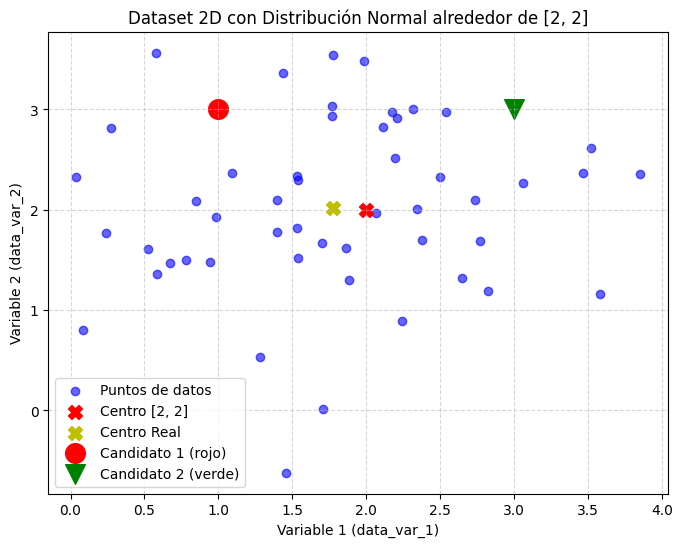

Centro real del cluster: x=1.77, y=2.02
Centro del cluster utilizado para el ejemplo: x=2.00, y=2.00


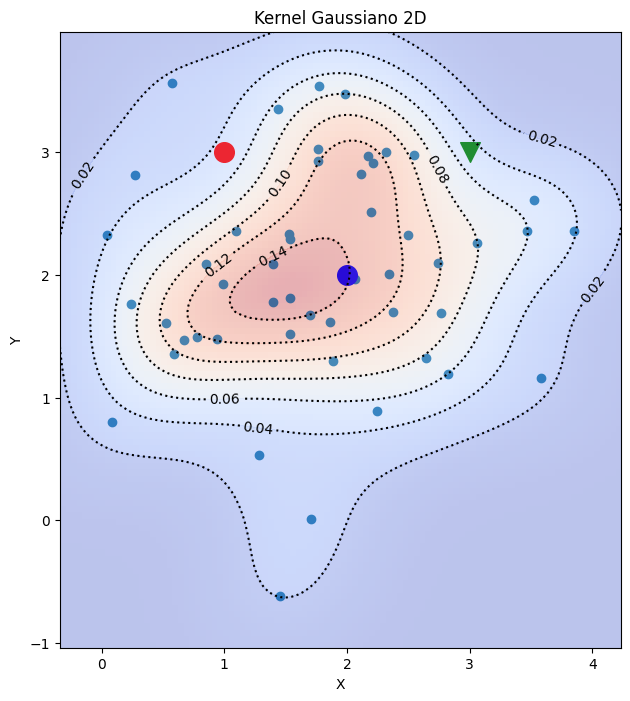

In [7]:
# Cargar dataset
ds_center = np.array([2, 2])
dx, dy =cargar_datasetDistNormal(50, ds_center)
# establecemos nuestros dos puntos candidatos de prueba
c1 = np.array([ds_center[0] - 1, 3])
c2 = np.array([ds_center[1] + 1, 3])
visualize_scatter(dx, dy, ds_center, c1, c2)
visualize_dataset(dx, dy, ds_center, c1, c2)

# 🎯 **EJ 1:GRAFIQUE LAS DISTRIBUCIONES DE LOS DATASETS**

Dataset con Relación Lineal:
Centro real del cluster: x=1.77, y=1.77
Centro del cluster utilizado para el ejemplo: x=2.00, y=2.00


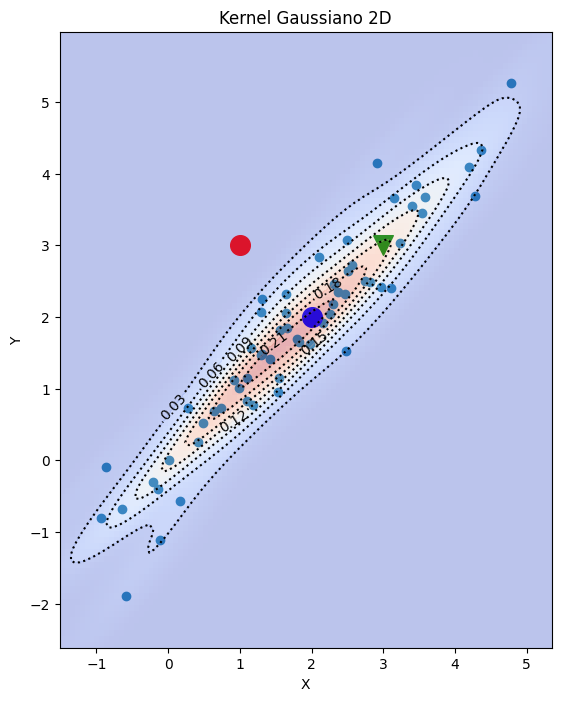


Dataset con Relación Cuadrática:
Centro real del cluster: x=-0.19, y=3.27
Centro del cluster utilizado para el ejemplo: x=0.00, y=0.00


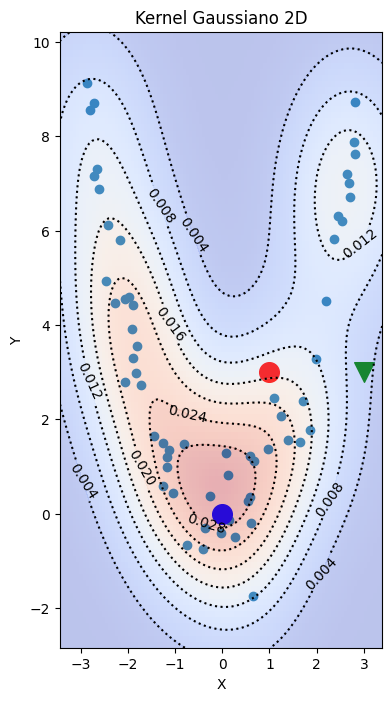

In [9]:
# TODO 1.1 crear y vizualizar el dataset con relacion lineal y con relacion cuadratica

#Grafica de la relacion lineal
dxr, dyr = cargar_datasetRelacionLineal(factor=np.array([1.5, 0.5]), n_data_points=60)
print("Dataset con Relación Lineal:")
visualize_dataset(dxr, dyr, ds_center, c1, c2)
plt.show()

#Grafica de la realcion cuadratica
dx2, dy2 = cargar_datasetRelacionCuadratica(coeficientes=np.array([1, 0, 0]), n_data_points=60, rango_x=(-3, 3))
print("\nDataset con Relación Cuadrática:")
visualize_dataset(dx2, dy2, np.array([0, 0]), c1, c2)
plt.show()

In [10]:
# Dataset grande
dxGrande, dyGrande =cargar_datasetRelacionLineal([20,10], 1000, [50,100])

# 🎯 **EJ 2: IDENTIFIQUE QUE TAN DEPENDIENTES SON LOS DATASETS**

In [11]:
# TODO 2.1 : Use la covarianza para identificar que tan dependiente es la relacion que existe entre los registros de los datasets {dx,dy}, {dxr, dyr}, {dx2, dy2} y {dxGrande, dyGrande}
# su codigo aqui np.cov

# Independientes
cov_normal = np.cov(dx, dy)
print(f'Covarianza dataset con distribución normal:\n{cov_normal}\n')

#Dependencia moderada
cov_lineal = np.cov(dxr, dyr)
print(f'Covarianza dataset con relación lineal:\n{cov_lineal}\n')

#Alta varianza y dependencia
cov_grande = np.cov(dxGrande, dyGrande)
print(f'Covarianza dataset con relación lineal Grande:\n{cov_grande}\n')

#Dependencia no lineal
cov_cuadratica = np.cov(dx2, dy2)
print(f'Covarianza dataset con relación cuadratica:\n{cov_cuadratica}\n')


Covarianza dataset con distribución normal:
[[0.87173739 0.08985489]
 [0.08985489 0.76444418]]

Covarianza dataset con relación lineal:
[[1.85717391 1.90489825]
 [1.90489825 2.17510611]]

Covarianza dataset con relación lineal Grande:
[[383.54554143 375.65364293]
 [375.65364293 467.25326789]]

Covarianza dataset con relación cuadratica:
[[ 3.35835547 -0.16912514]
 [-0.16912514  8.73798076]]



### 📈 **RESULTADOS:**
**Conteste las siguientes preguntas**

¿Qué dataset tiene una mayor dependencia lineal entre sus dos variables?
El data set con mayor dependencia lineal es el dataset con realcion lineal grande, ya que al analizar la matriz de covarianza es el que presente un valor mas elevado con respecto a los otros data set.

¿Cual es el problema que tiene la covarianza?
El problema que presenta la covarianza, es que al comparar el segundo y tercer resultado, se evidencia que depende de la escala de las variables.

In [12]:
# TODO 2.2: Use el coeficiente de correlación de Pearson para identificar que tan dependiente es la relacion que existe entre los registros de los datasets {dx,dy}, {dxr, dyr} y {dxGrande, dyGrande}
# su codigo aqui np.corrcoef

# Dataset Distribución Normal
corr_normal = np.corrcoef(dx, dy)[0, 1]
print(f'Correlación de Pearson dataset normal: {corr_normal:.4f}')

# Dataset Relación Lineal
corr_lineal = np.corrcoef(dxr, dyr)[0, 1]
print(f'Correlación de Pearson relación lineal: {corr_lineal:.4f}')

# Dataset Relación Lineal Grande
corr_grande = np.corrcoef(dxGrande, dyGrande)[0, 1]
print(f'Correlación de Pearson relación lineal Grande: {corr_grande:.4f}')

Correlación de Pearson dataset normal: 0.1101
Correlación de Pearson relación lineal: 0.9478
Correlación de Pearson relación lineal Grande: 0.8874


### 📈 **RESULTADOS:**
**Conteste las siguientes preguntas**

¿Qué dataset tiene una mayor dependencia lineal entre sus dos variables?
El dataset que tiene mayor dependencia linal es el de la relación lineal, la que presenta un valor mas grande, aunque el ejericio anterior nos decia que es el dataset con realcion lineal Grande, el de coefciente de relacion de pearson nos dice que en realidad la relacion es mas fuerte en el data set con relacion lineal.

¿Que medida es mas facil de interpretar para identificar la dependencia entre dos variables de un dataset?
El coeficiente de correlación de Pearson.

# 🎯 **EJ 3: CREE LAS FUNCIONES DE LAS MEDIDAS DE DISIMILITUD**

In [ ]:
#  TODO 3.1 completar el codigo de las funciones de las siguientes medidas de disimilitud:
#  Distancia Euclidiana, Distancia Manhattan, Distancia Chebyshev, Similitud de Coseno, Mahalanobis y Jaccard
#  En scipy.spatial.distance tenemos disponibles las distancias minkowski, mahalanobis, jaccard, hamming, euclidean, cosine, entre otras.
#  En numpy tenemos la norma p =  np.linalg.norm

In [13]:
def distancia_euclidiana(p1, p2):
    dist = np.linalg.norm(p2 - p1, ord=2)
    print(f'Distancia euclidiana del punto {p1} al punto {p2} = {dist:.4f}')
    return dist

In [14]:
def distancia_manhattan(p1, p2):
    dist = np.linalg.norm(p2 - p1, ord=1)
    print(f'Distancia manhattan del punto {p1} al punto {p2} = {dist:.4f}')
    return dist

In [ ]:
# ← COMPLETAR Chebyshev, Similitud de Coseno, Mahalanobis y Jaccard

In [15]:
def distancia_chebyshev(p1, p2):
    dist = np.linalg.norm(p2 - p1, ord=np.inf)
    print(f'Distancia Chebyshev del punto {p1} al punto {p2} = {dist:.4f}')
    return dist

In [16]:
def similitud_coseno(p1, p2):
    sim = 1 - distance.cosine(p1, p2)
    print(f'Similitud de Coseno entre {p1} y {p2} = {sim:.4f}')
    return sim

In [17]:
def distancia_mahalanobis(p1, p2, dataset_x, dataset_y):
    datos = np.vstack([dataset_x, dataset_y])
    cov = np.cov(datos)
    inv_cov = np.linalg.inv(cov)
    dist = distance.mahalanobis(p1, p2, inv_cov)
    print(f'Distancia Mahalanobis (basada en el dataset) = {dist:.4f}')
    return dist

def distancia_jaccard(p1, p2):
    dist = distance.jaccard(p1, p2)
    print(f'Distancia Jaccard entre {p1} y {p2} = {dist:.4f}')
    return dist

In [20]:
from scipy.spatial import distance
import numpy as np

# Ejecutar funciones
print("🔍 Calculando las distancias de los puntos candidatos al centro")
print('Distancias primer dataset (Normal)')
ds_center_real1 = np.array([np.mean(dx), np.mean(dy)])

dist_euc1 = distancia_euclidiana(c1, ds_center_real1)
dist_euc2 = distancia_euclidiana(c2, ds_center_real1)
dist_man1 = distancia_manhattan(c1, ds_center_real1)
dist_cheb1 = distancia_chebyshev(c1, ds_center_real1)
dist_cos1 = similitud_coseno(c1, ds_center_real1)
dist_maha1 = distancia_mahalanobis(c1, ds_center_real1, dx, dy)

print('\nDistancias segundo dataset (Relación Lineal) ')
ds_center_real2 = np.array([np.mean(dxr), np.mean(dyr)])

dist_euc_r1 = distancia_euclidiana(c1, ds_center_real2)
dist_man_r1 = distancia_manhattan(c1, ds_center_real2)
dist_maha_r1 = distancia_mahalanobis(c1, ds_center_real2, dxr, dyr)

print('\Distancias tercer dataset (Relación Lineal Grande)')
ds_center_realG = np.array([np.mean(dxGrande), np.mean(dyGrande)])

dist_euc_G1 = distancia_euclidiana(c1, ds_center_realG)
dist_maha_G1 = distancia_mahalanobis(c1, ds_center_realG, dxGrande, dyGrande)

print('\nDistancias cuarto dataset (Relación Cuadrática)')
ds_center_real2 = np.array([np.mean(dx2), np.mean(dy2)])

dist_euc_q1 = distancia_euclidiana(c1, ds_center_real2)
dist_maha_q1 = distancia_mahalanobis(c1, ds_center_real2, dx2, dy2)

🔍 Calculando las distancias de los puntos candidatos al centro
Distancias primer dataset (Normal)
Distancia euclidiana del punto [1 3] al punto [1.77452609 2.01778087] = 1.2509
Distancia euclidiana del punto [3 3] al punto [1.77452609 2.01778087] = 1.5705
Distancia manhattan del punto [1 3] al punto [1.77452609 2.01778087] = 1.7567
Distancia Chebyshev del punto [1 3] al punto [1.77452609 2.01778087] = 0.9822
Similitud de Coseno entre [1 3] y [1.77452609 2.01778087] = 0.9212
Distancia Mahalanobis (basada en el dataset) = 1.4771

Distancias segundo dataset (Relación Lineal) 
Distancia euclidiana del punto [1 3] al punto [1.76801798 1.76617626] = 1.4533
Distancia manhattan del punto [1 3] al punto [1.76801798 1.76617626] = 2.0018
Distancia Mahalanobis (basada en el dataset) = 4.3345
\Distancias tercer dataset (Relación Lineal Grande)
Distancia euclidiana del punto [1 3] al punto [50.38664112 51.09500349] = 68.9360
Distancia Mahalanobis (basada en el dataset) = 2.5219

Distancias cuarto da

<>:23: SyntaxWarning: invalid escape sequence '\D'
<>:23: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipython-input-2126471257.py:23: SyntaxWarning: invalid escape sequence '\D'
  print('\Distancias tercer dataset (Relación Lineal Grande)')


### 📈 **RESULTADOS:**
**Conteste las siguientes preguntas**

¿Qué medidas de disimilitud son de un punto a otro punto?

La distancia euclidiana, distancia de Manhattan, distancia Chebyshev y similitud de coseno.

¿Qué medidas de disimilitud son de un punto a una distribución?

La distancia de Mahalanobis

¿La distancia de Mahalanobis es capaz de tener en cuenta la distribución real de los datos?

Sí, es capaz ya que si comparamos los resultados del dataset con la relación lineal grande, podemos notar que la distancia euclidiana es muy elevada (68.9360), porque el punto (1,3) está físicamente muy lejos del centro (50.38,51.09), a pesar de esto, la Distancia Mahalanobis es significativamente más baja (2.5219).

# 🔄 **EJ 4: MATRIZ DE DISTANCIAS**

Cree un metodo que sea capaz de calcular la matriz de distancias de todos los puntos de un dataset, recive como parametros la medida de disimilitud y en algunos casos la matriz de covarianza

In [21]:
import itertools as it
from scipy.spatial import distance

# TODO 4.1 completar el código
def matriz_distancias(X, distancia_func, mC=None):
    n_samples = X.shape[0]
    mD = np.zeros((n_samples, n_samples))
    mC_inv = None
    if mC is not None:
        mC_inv = np.linalg.pinv(mC)
    for pair in it.product(np.arange(n_samples), repeat=2):
        i, j = pair
        if i == j:
            mD[pair] = 0.0
            continue

        if mC is not None:
            mD[pair] = distance.mahalanobis(X[i], X[j], mC_inv)
        else:
            mD[pair] = distancia_func(X[i], X[j])

    return mD
    return mD


--- Procesando Distribución Normal ---


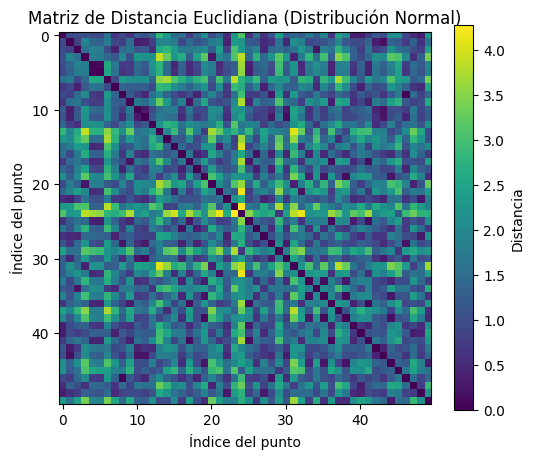

Matriz distancias Mahalanobis (Distribución Normal):
 [[0.         1.00559597 1.18091974 1.11896027 1.1929166 ]
 [1.00559597 0.         0.94482618 2.01702317 1.64411471]
 [1.18091974 0.94482618 0.         1.66751726 2.27525495]
 [1.11896027 2.01702317 1.66751726 0.         2.00484762]
 [1.1929166  1.64411471 2.27525495 2.00484762 0.        ]]


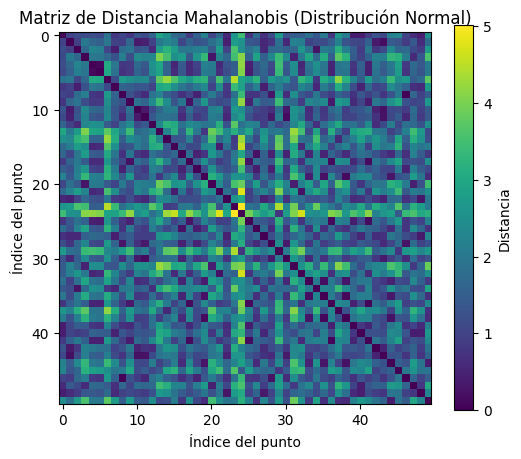


--- Procesando Relación Lineal ---


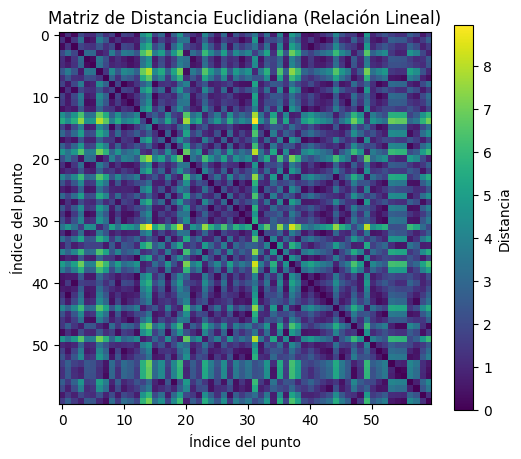

Matriz distancias Mahalanobis (Relación Lineal):
 [[0.         0.78803607 0.69906362 1.41149691 1.64330342]
 [0.78803607 0.         1.35512022 2.19283858 1.07409725]
 [0.69906362 1.35512022 0.         0.97789008 2.3243264 ]
 [1.41149691 2.19283858 0.97789008 0.         2.98925326]
 [1.64330342 1.07409725 2.3243264  2.98925326 0.        ]]


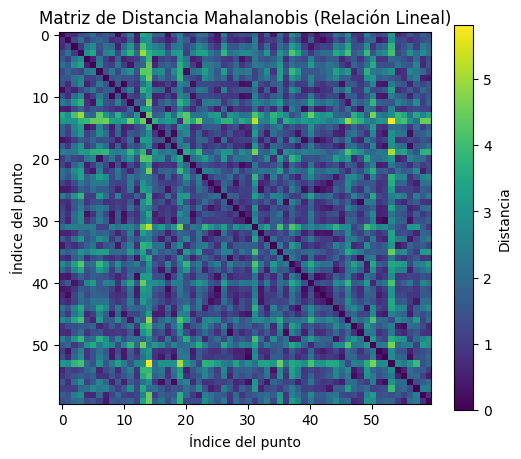


--- Procesando Relación Cuadrática ---


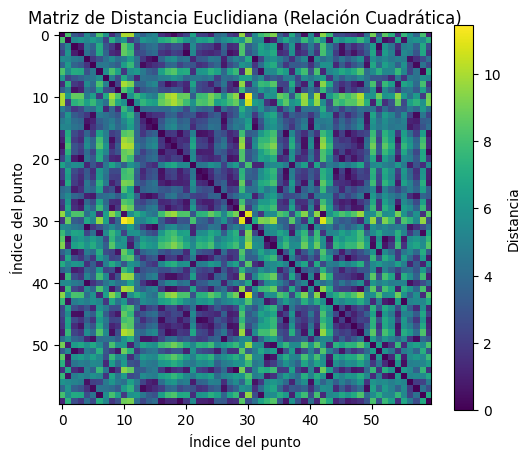

Matriz distancias Mahalanobis (Relación Cuadrática):
 [[0.         3.17578017 1.4095423  0.98677159 1.87932702]
 [3.17578017 0.         1.90863745 2.21804841 2.72713679]
 [1.4095423  1.90863745 0.         0.4543196  2.11256279]
 [0.98677159 2.21804841 0.4543196  0.         1.80623144]
 [1.87932702 2.72713679 2.11256279 1.80623144 0.        ]]


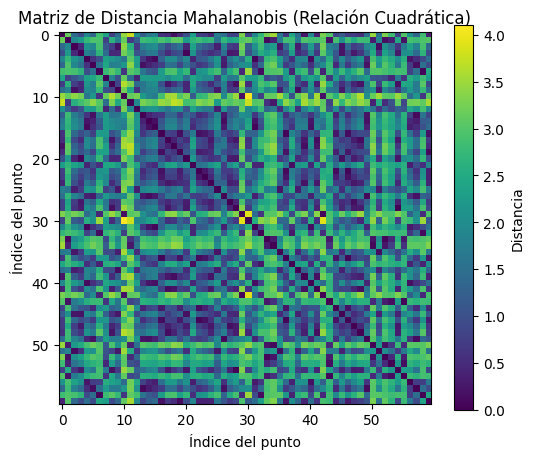

In [23]:
import seaborn as sns

 # ← COMPLETAR calcule y grafique la matriz de distancias para todos los datasets y use la medida de disimilitud euclidiana y mahalanobis
# calculamos primero la matriz de covarianzas

def graficar_matriz(matriz, titulo):
    plt.figure(figsize=(6, 5))
    plt.imshow(matriz, cmap='viridis', interpolation='nearest')
    plt.colorbar(label='Distancia')
    plt.title(titulo)
    plt.xlabel('Índice del punto')
    plt.ylabel('Índice del punto')
    plt.show()

# Lista de datasets para iterar
datasets = [
    ("Distribución Normal", dx, dy),
    ("Relación Lineal", dxr, dyr),
    ("Relación Cuadrática", dx2, dy2)
]

for nombre, data_x, data_y in datasets:
    print(f'\n--- Procesando {nombre} ---')

    # Preparamos la matriz X (n_samples, n_features)
    X = np.column_stack((data_x, data_y))

    # Matriz de Distancia EUCLIDIANA
    # Usamos una lambda para adaptar la función al formato de matriz_distancias
    func_euc = lambda p1, p2: np.linalg.norm(p2 - p1, ord=2)
    Ma_euclidiana = matriz_distancias(X, func_euc)
    graficar_matriz(Ma_euclidiana, f'Matriz de Distancia Euclidiana ({nombre})')

    # Matriz de Distancia MAHALANOBIS
    # Calculamos la matriz de covarianzas (transponemos X para que sea de variables x observaciones)
    mC = np.cov(X.T)

    # Calculamos la matriz usando la función directa de scipy por eficiencia en el loop
    Ma_mahalanobis = matriz_distancias(X, distance.mahalanobis, mC)

    print(f'Matriz distancias Mahalanobis ({nombre}):\n', Ma_mahalanobis[:5, :5]) # Mostramos solo un fragmento
    graficar_matriz(Ma_mahalanobis, f'Matriz de Distancia Mahalanobis ({nombre})')

Text(0.5, 1.0, 'Mahalanobis')

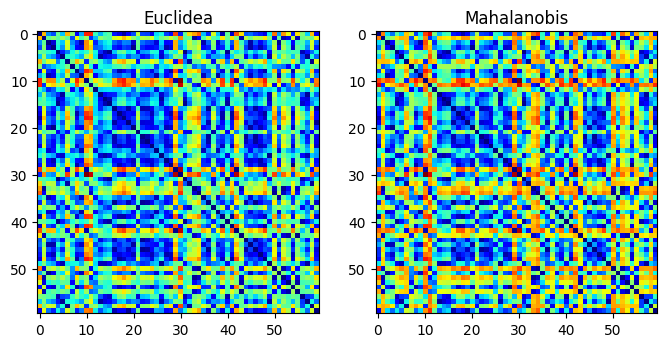

In [25]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(Ma_euclidiana, cmap='jet')
ax[0].set_title('Euclidea')
ax[1].imshow(Ma_mahalanobis, cmap='jet')
ax[1].set_title('Mahalanobis')

In [26]:
#Hasta ahora hemos visto todo disimilitudes (distancias). ¿Y si quisiéramos una medida de similitud?
def matriz_similitud(X, distancia, mC=None):
    if mC is not None:
        mD = matriz_distancias(X, distancia, mC)
    else:
        mD = matriz_distancias(X, distancia)

    sigma = np.std(mD)
    if sigma == 0: sigma = 1

    mS = np.exp(-mD / sigma)

    return mS


--- Graficando Matrices de Similitud ---

--- Procesando similitudes para Distribución Normal ---
Matriz de Similitud Euclidiana (Distribución Normal):
 [[1.         0.31940138 0.29707907 0.278614   0.29548758]
 [0.31940138 1.         0.36596909 0.09799201 0.18236637]
 [0.29707907 0.36596909 1.         0.15447025 0.09979796]
 [0.278614   0.09799201 0.15447025 1.         0.11463761]
 [0.29548758 0.18236637 0.09979796 0.11463761 1.        ]]


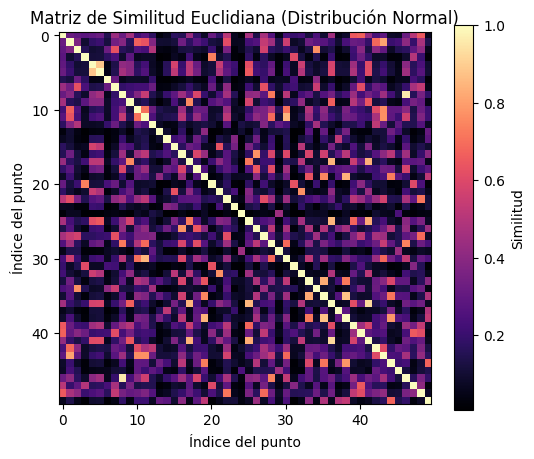

Matriz de Similitud Mahalanobis (Distribución Normal):
 [[1.         0.33607759 0.27789145 0.29720318 0.27429984]
 [0.33607759 1.         0.35896953 0.11223622 0.16816864]
 [0.27789145 0.35896953 1.         0.16395481 0.08482526]
 [0.29720318 0.11223622 0.16395481 1.         0.11372785]
 [0.27429984 0.16816864 0.08482526 0.11372785 1.        ]]


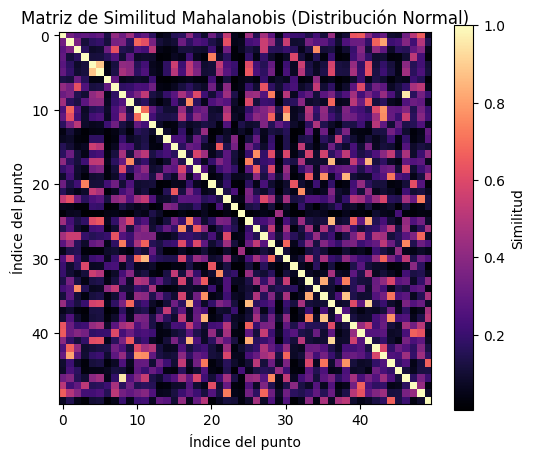


--- Procesando similitudes para Relación Lineal ---
Matriz de Similitud Euclidiana (Relación Lineal):
 [[1.         0.4634176  0.86105989 0.30234071 0.48156539]
 [0.4634176  1.         0.42690199 0.14018481 0.78955022]
 [0.86105989 0.42690199 1.         0.32453179 0.42925457]
 [0.30234071 0.14018481 0.32453179 1.         0.14792174]
 [0.48156539 0.78955022 0.42925457 0.14792174 1.        ]]


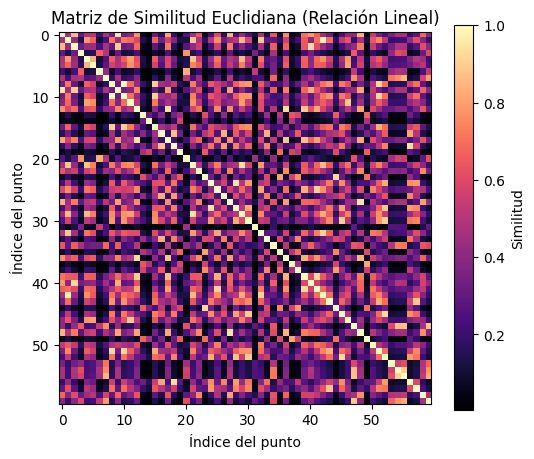

Matriz de Similitud Mahalanobis (Relación Lineal):
 [[1.         0.43709673 0.4799078  0.22710031 0.1780291 ]
 [0.43709673 1.         0.2409523  0.09996514 0.32367217]
 [0.4799078  0.2409523  1.         0.35808435 0.08707172]
 [0.22710031 0.09996514 0.35808435 1.         0.04331164]
 [0.1780291  0.32367217 0.08707172 0.04331164 1.        ]]


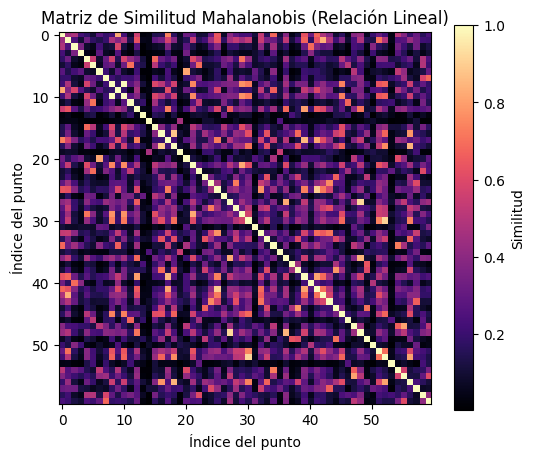


--- Procesando similitudes para Relación Cuadrática ---
Matriz de Similitud Euclidiana (Relación Cuadrática):
 [[1.         0.0370045  0.28723104 0.39213231 0.11406668]
 [0.0370045  1.         0.11582857 0.09235789 0.11988862]
 [0.28723104 0.11582857 1.         0.7043156  0.15737532]
 [0.39213231 0.09235789 0.7043156  1.         0.17895143]
 [0.11406668 0.11988862 0.15737532 0.17895143 1.        ]]


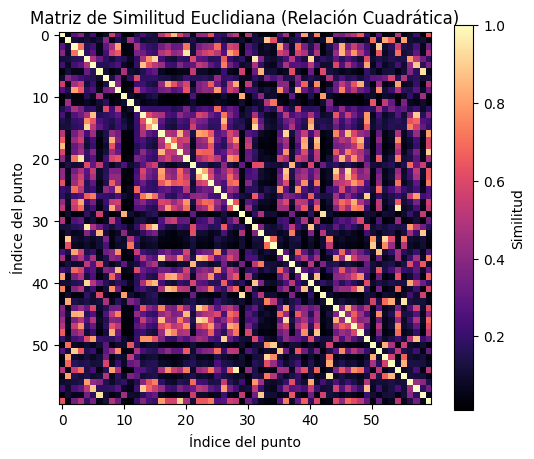

Matriz de Similitud Mahalanobis (Relación Cuadrática):
 [[1.         0.03954437 0.23841209 0.36651281 0.14784231]
 [0.03954437 1.         0.14349961 0.10475314 0.06241298]
 [0.23841209 0.14349961 1.         0.62994445 0.11661805]
 [0.36651281 0.10475314 0.62994445 1.         0.15925352]
 [0.14784231 0.06241298 0.11661805 0.15925352 1.        ]]


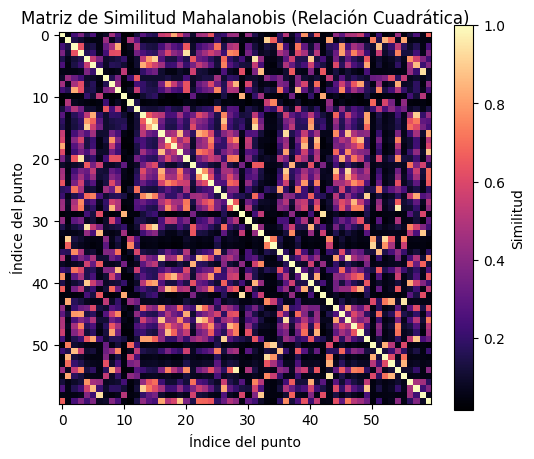

In [27]:
# Complete 4.3 Grafique la matriz de similitud

def graficar_matriz(matriz, titulo, cmap='viridis'):
    plt.figure(figsize=(6, 5))
    plt.imshow(matriz, cmap=cmap, interpolation='nearest')
    plt.colorbar(label='Similitud')
    plt.title(titulo)
    plt.xlabel('Índice del punto')
    plt.ylabel('Índice del punto')
    plt.show()


print("\n--- Graficando Matrices de Similitud ---")
datasets = [
    ("Distribución Normal", dx, dy),
    ("Relación Lineal", dxr, dyr),
    ("Relación Cuadrática", dx2, dy2)
]

for nombre, data_x, data_y in datasets:
    print(f'\n--- Procesando similitudes para {nombre} ---')
    X = np.column_stack((data_x, data_y))
    func_euc = lambda p1, p2: np.linalg.norm(p2 - p1, ord=2)
    mS_euclidiana = matriz_similitud(X, func_euc)
    print(f'Matriz de Similitud Euclidiana ({nombre}):\n', mS_euclidiana[:5, :5])
    graficar_matriz(mS_euclidiana, f'Matriz de Similitud Euclidiana ({nombre})', cmap='magma')
    mC_data = np.cov(X.T)
    mS_mahalanobis = matriz_similitud(X, distance.mahalanobis, mC=mC_data)
    print(f'Matriz de Similitud Mahalanobis ({nombre}):\n', mS_mahalanobis[:5, :5])
    graficar_matriz(mS_mahalanobis, f'Matriz de Similitud Mahalanobis ({nombre})', cmap='magma')

# ✅ **RESULTADOS:**
¿Cual grafico es mas facil de interpretar: el de una medida de disimilitud o de similitud?

La mediada de similitud


# 🚀 ¡TALLER FINALIZADO!"